In [1]:
import pandas as pd
import numpy as np

In [6]:
class Activation:
    def __init__(self, func):
        self.__func = func
    
    def activate(self, X):
        if self.__func == "relu":
            return np.maximum(0, X)
        elif self.__func == "softmax":
            exp_values = np.exp(X - np.max(X, axis=1, keepdims=True))
            return exp_values / np.sum(exp_values, axis=1, keepdims=True)
        else:
            return X
    
    def activate_derivative(self, X):
        if self.__func == "relu":
            return np.where(X > 0, 1, 0)
        elif self.__func == "softmax":
            return X
        else:  # no activation
            return np.ones_like(X)

In [7]:
class Layer:
    def __init__(self, output_size, input_size, activation="none"):
        self.weights = np.random.rand(output_size, input_size)
        self.bias = np.random.rand(output_size, 1)
        self.__activation = Activation(activation)
    
    def activate(self, X):
        return self.__activation.activate(X)
    
    def activation_derivative(self):
        return self.__activation.activate_derivative(self.output)

In [485]:
class Dense(Layer):
    def __init__(self,output_size, input_size, activation="none"):
        Layer.__init__(self, output_size, input_size, activation)
    
    def forward_pass(self, data):
        self.input = np.array(data)
        self.output = self.activate(np.dot(self.weights, self.input) + self.bias) # -- activation
        # self.output = np.dot(self.weights, self.input) + self.bias # -- no activation
        return self.output
    
    def backward_pass(self, loss_gradient, learning_rate):
        activation_gradient = self.activation_derivative()
        output_gradient = loss_gradient * activation_gradient
        
        weights_gradient = np.dot(output_gradient, self.input.T)
        
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * np.sum(output_gradient, axis=1, keepdims=True)
        
        input_gradient = np.dot(self.weights.T, output_gradient)
        return input_gradient

In [489]:
class Sequential:
    def __init__(self):
        self.__layers = []
    
    def add(self, layer):
        self.__layers.append(layer)
        
    def forward_pass(self, data):
        output = data
        for layer in self.__layers:
            output = layer.forward_pass(output)
        return output
    
    def backward_pass(self, loss_gradient, learning_rate):
        for layer in reversed(self.__layers):
            loss_gradient = layer.backward_pass(loss_gradient, learning_rate)
    
    def compile_(self, loss):
        self.__loss = loss
    
    def fit(self, X, Y, epochs, learning_rate):
        X = np.array(X)
        Y = np.array(Y)
        for epoch in range(1,epochs+1):
            output = self.forward_pass(X)
            loss_gradient = self.__loss.gradient(output, Y)
            self.backward_pass(loss_gradient, learning_rate)
            loss_value = self.__loss.calculate(output, Y)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}/{epochs}, Loss: {loss_value}")
    
    def predict(self, X):
        X = np.array(X)
        pred = self.forward_pass(X.T)
        res = np.mean(pred, axis=0)
        return [round(i) for i in res]
    
    def coef(self):
        return self.__layers[-1].weights, self.__layers[-1].bias

In [19]:
class Loss:
    def calculate(self, output, y):
        raise NotImplementedError
    
    def gradient(self, output, y):
        raise NotImplementedError

In [447]:
class MSE(Loss):
    def calculate(self, output, Y):
        n_samples = output.shape[1]
        loss = np.mean(np.mean((output - Y)**2 / 2, axis=1))
        return loss
    
    def gradient(self, output, Y):
        n_samples = output.shape[1]
        loss_gradient = (output - Y)/n_samples
        return loss_gradient

In [583]:
def generate_random_samples(n_samples, a, b):
    # Generating random values for the first three columns
    return np.random.randint(a, b, size=(n_samples, 3))
    
# random_samples = generate_random_samples(10000, 0, 100)
# data = pd.DataFrame(random_samples, columns=['x','y','z'])
# data['target'] = data['x'] + 2 * data['y'] + 3 * data['z']

In [445]:
# data.to_csv('data/numbers.csv', index = False)

In [365]:
data = pd.read_csv('data/numbers.csv')
data.head()

,x,y,z,target
0,33,10,98,347
1,20,80,56,348
2,24,94,97,503
3,87,44,41,298
4,42,94,43,359


In [366]:
data.shape

(10000, 4)

In [367]:
Y = np.array(data.target)
X = np.array(data.drop('target',axis=1))

In [401]:
X_train, X_test, Y_train, Y_test = X[:9000], X[9000:], Y[:9000], Y[9000:]

In [469]:
model = Sequential()
model.add(Dense(4,3,activation="relu"))
model.add(Dense(3,4,activation="relu"))
model.compile_(MSE())

In [470]:
model.fit(X_train.T, Y_train, epochs=10000, learning_rate=0.00001)

Epoch 100/10000, Loss: 3.7233930340060817
Epoch 200/10000, Loss: 1.7987099391084687
Epoch 300/10000, Loss: 1.0225569711195213
Epoch 400/10000, Loss: 0.6695811978423657
Epoch 500/10000, Loss: 0.4929298557696895
Epoch 600/10000, Loss: 0.3955780919202437
Epoch 700/10000, Loss: 0.33630720270932596
Epoch 800/10000, Loss: 0.29663810880942715
Epoch 900/10000, Loss: 0.2678812183695584
Epoch 1000/10000, Loss: 0.24573458539059767
Epoch 1100/10000, Loss: 0.22793614904653395
Epoch 1200/10000, Loss: 0.21321058024735828
Epoch 1300/10000, Loss: 0.20078281559939304
Epoch 1400/10000, Loss: 0.19014611974996756
Epoch 1500/10000, Loss: 0.18094727521334664
Epoch 1600/10000, Loss: 0.17292709662890982
Epoch 1700/10000, Loss: 0.16588789116649574
Epoch 1800/10000, Loss: 0.15967454385579027
Epoch 1900/10000, Loss: 0.15416281217881436
Epoch 2000/10000, Loss: 0.1492516422388758
Epoch 2100/10000, Loss: 0.14485786109183332
Epoch 2200/10000, Loss: 0.1409123563816873
Epoch 2300/10000, Loss: 0.1373572377350726
Epoch 2

In [471]:
model.predict([[10,100,1000]]) #answer is 3210

[3202]

In [472]:
Y_pred = model.predict(X_test)

In [425]:
from sklearn.metrics import r2_score

In [473]:
y_train_pred = model.predict(X_train)
r2_score(Y_train, y_train_pred)

0.9999789603922297

In [474]:
r2_score(Y_test, Y_pred) #accuracy

0.9999793619142606

Text(0, 0.5, 'Predicted values')

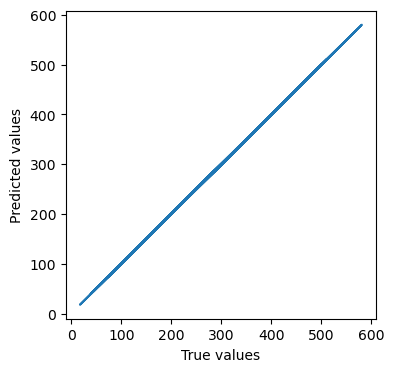

In [475]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.plot(Y_test, Y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')

In [479]:
from joblib import dump, load
dump(model, 'model/numbers_model.joblib')

['model/numbers_model.joblib']

In [480]:
saved_model = load('model/numbers_model.joblib')

In [484]:
saved_model.predict([[15, 22, 10]]) #answer is 89

[90]

In [488]:
saved_model.predict([[7, 10, 11]]) #answer is 60

[61]

In [514]:
model2 = Sequential()
model2.add(Dense(3,3,activation="relu"))
model2.compile_(MSE())

In [515]:
model2.fit(X_train.T, Y_train, epochs=1000, learning_rate=0.0001)

Epoch 100/1000, Loss: 0.00982752828657723
Epoch 200/1000, Loss: 0.009794861362084706
Epoch 300/1000, Loss: 0.009775502989782367
Epoch 400/1000, Loss: 0.009756182877224353
Epoch 500/1000, Loss: 0.009736900948558279
Epoch 600/1000, Loss: 0.009717657128319008
Epoch 700/1000, Loss: 0.009698451341188769
Epoch 800/1000, Loss: 0.009679283511999358
Epoch 900/1000, Loss: 0.009660153565732355
Epoch 1000/1000, Loss: 0.009641061427515777


In [516]:
model2.predict([[7, 10, 11]]) # 60

[60]

In [518]:
model2.predict([[10, 100, 1000]]) # 3210

[3208]

In [604]:
model2.predict([[15, 22, 10]]) #89

[89]

In [522]:
model2.coef()

(array([[0.99695976, 1.99706933, 2.99704085],
        [0.99900642, 1.99904223, 2.99903292],
        [0.99653017, 1.99665522, 2.99662272]]),
 array([[0.49263329],
        [0.16099691],
        [0.56224364]]))

In [536]:
w, b = model2.coef()

In [606]:
w[1], max(b)

(array([0.99845748, 1.99851307, 2.99849862]), array([0.96333404]))

In [605]:
np.round(w[1]), np.round(np.max(b))

(array([1., 2., 3.]), 1.0)

In [545]:
# let's try with 4 neurons

In [546]:
model3 = Sequential()
model3.add(Dense(4,3,activation="relu"))
model3.compile_(MSE())

In [547]:
model3.fit(X_train.T, Y_train, epochs=1000, learning_rate=0.0001)

Epoch 100/1000, Loss: 0.017998876492139222
Epoch 200/1000, Loss: 0.01794484488895161
Epoch 300/1000, Loss: 0.017909379048832993
Epoch 400/1000, Loss: 0.017873983303016004
Epoch 500/1000, Loss: 0.017838657512657105
Epoch 600/1000, Loss: 0.017803401539497776
Epoch 700/1000, Loss: 0.017768215245553644
Epoch 800/1000, Loss: 0.017733098493111436
Epoch 900/1000, Loss: 0.017698051144729762
Epoch 1000/1000, Loss: 0.01766307306324206


In [548]:
w, b = model3.coef()

In [550]:
w, b

(array([[0.99753668, 1.99762546, 2.99760238],
        [0.99845748, 1.99851307, 2.99849862],
        [0.99674296, 1.99686033, 2.99682983],
        [0.99405488, 1.99426913, 2.99421345]]),
 array([[0.39915041],
        [0.24994634],
        [0.52776432],
        [0.96333404]]))

In [607]:
model3.predict([[15, 22, 11]]) # 92

[92]

In [573]:
test_input = [[2887, 5612, 163],[161, 134, 119],[21, 73, 96]]
print(model3.predict(test_input)) 
print(model2.predict(test_input))
print(model.predict(test_input))

[14573, 785, 455]
[14579, 785, 455]
[14532, 784, 455]


In [574]:
(2887 + 5612*2 + 163*3), (161 + 134*2 + 119*3), (21 + 73*2 + 96*3)

(14600, 786, 455)

In [612]:
joblib.dump(model2, 'model/numbers-model-v2.joblib')

['model/numbers-model-v2.joblib']

In [577]:
saved_model2 = joblib.load('model/numbers-model-v2.joblib')

In [610]:
saved_model2.predict([[43, 64, 59]]) # 348

[348]

In [594]:
r2_score(Y_test, model2.predict(X_test)), r2_score(Y_test, model3.predict(X_test))

(1.0, 0.9999999125504841)

In [602]:
test_samples = generate_random_samples(100, 5000, 10000)
m = np.array([1, 2, 3])
y_high_test = np.sum(test_samples * m, axis=1)
y_high_test[0], test_samples[0]

(46443, array([6203, 8357, 7842]))

In [603]:
r2_score(y_high_test, model2.predict(test_samples)), r2_score(y_high_test, model3.predict(test_samples))

(0.9998934791509899, 0.9998140506855663)

In [597]:
# Even with higher numbers model 2 perform better